In [26]:
import numpy as np

def find_remove_outlier(data_sample):
    # calculate summarty stats
    data_mean, data_std = np.mean(data_sample), np.std(data_sample)
    # define outliers
    remove_outliers = data_std * 3
    lower, upper = data_mean - remove_outliers, data_mean + remove_outliers
    # identify the outliers
    outliers = []
    outliers_removed = []
    for x in data_sample:
        if x < lower or x > upper:
            outliers.append(x)
    for x in data_sample:
        if x > lower and x < upper:
            outliers_removed.append(x)
    return outliers, outliers_removed
        

In [27]:
import scipy.stats
def find_remove_outliers_iqr(data_sample):
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    
    iqr = q75 - q25
    print(iqr)
    remove_outliers = iqr * 1.5
    lower, upper = q25 - remove_outliers, q75 + remove_outliers
    outliers = []
    outliers_removed = []
    for x in data_sample:
        if x < lower or x > upper:
            outliers.append(x)
    for x in data_sample:
        if x > lower and x < upper:
            outliers_removed.append(x)
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((scipy.stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outliers_iqr(x))
print(scipy.stats.iqr(x))
    

<class 'numpy.ndarray'>
1.6125559284401172
[-5.0, 11.0, 14.0]
1.6125559284401172


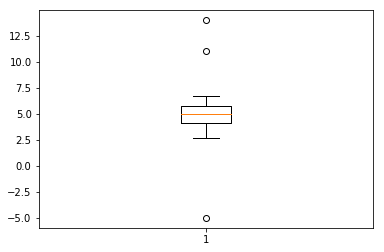

In [31]:
import matplotlib.pyplot as plt

plt.boxplot(x)
plt.show()

In [77]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('iris.csv')

In [78]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
len(df[df['Species'] == 'Iris-setosa'])

50

In [80]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


0.8717541573048714
(0.8717541573048712, 1.0384540627941809e-47)


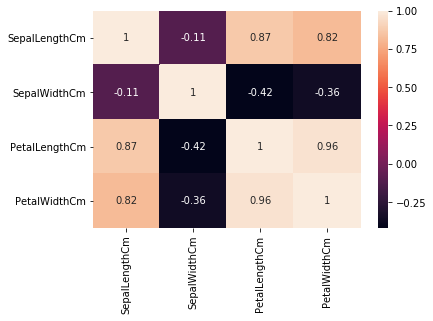

In [81]:
df = df.drop(columns=['Id', 'Species'])
sns.heatmap(df.corr(), annot=True)
def pearson_corr(x, y):
    x_mean, y_mean  = np.mean(x), np.mean(y)

    num = []
    den_1 = []
    den_2 = []
    for i, j in zip(x,y):
        num.append((i - x_mean) * (j - y_mean))
    for i in x:
        den_1.append((i - x_mean) **2)
    for j in y:
        den_2.append((j - y_mean) **2)
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print(scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))
        

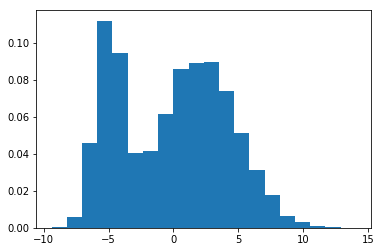

[[-4.92506706]
 [ 2.18473051]]
[[[1.14939561]]

 [[8.23159596]]]
[0.32089691 0.67910309]


In [88]:
from sklearn import mixture

x_1 = np.random.normal(-5, 1, 3000)

x_2 = np.random.normal(2, 3, 7000)

x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1, 1))
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)

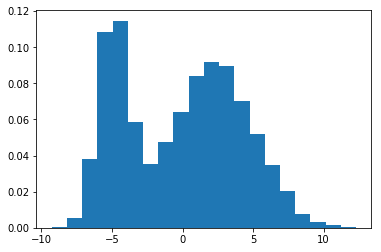

In [95]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

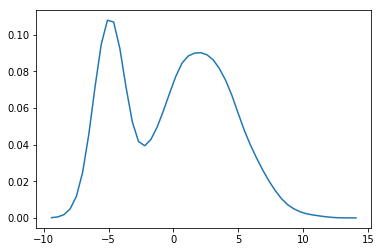

In [96]:

from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

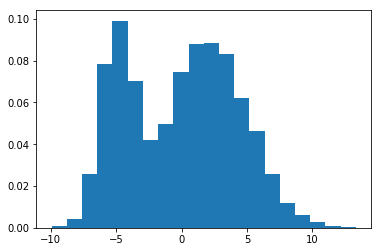

In [97]:

m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()